### Importación de datos



In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns


tienda['Tienda'] = 'Tienda 1'
tienda2['Tienda'] = 'Tienda 2' 
tienda3['Tienda'] = 'Tienda 3'
tienda4['Tienda'] = 'Tienda 4'


datos_completos = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)


datos_completos['Fecha de Compra'] = pd.to_datetime(datos_completos['Fecha de Compra'], format='%d/%m/%Y')


facturacion_por_tienda = datos_completos.groupby('Tienda')['Precio'].sum().reset_index()
facturacion_por_tienda = facturacion_por_tienda.sort_values('Precio', ascending=False)

print("=== ANÁLISIS DE FACTURACIÓN ===")
print("\nFacturación total por tienda:")
for _, row in facturacion_por_tienda.iterrows():
    print(f"{row['Tienda']}: ${row['Precio']:,.0f}")

print(f"\nFacturación total del negocio: ${datos_completos['Precio'].sum():,.0f}")

=== ANÁLISIS DE FACTURACIÓN ===

Facturación total por tienda:
Tienda 1: $1,150,880,400
Tienda 2: $1,116,343,500
Tienda 3: $1,098,019,600
Tienda 4: $1,038,375,700

Facturación total del negocio: $4,403,619,200


In [ ]:

print("Columnas disponibles:")
print(datos_completos.columns.tolist())
print("\nPrimeras filas del dataset:")
print(datos_completos.head())

Columnas disponibles:
['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío', 'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación', 'Método de pago', 'Cantidad de cuotas', 'lat', 'lon', 'Tienda']

Primeras filas del dataset:
            Producto Categoría del Producto    Precio  Costo de envío  \
0  Asistente virtual           Electrónicos  164300.0          6900.0   
1    Mesa de comedor                Muebles  192300.0          8400.0   
2      Juego de mesa               Juguetes  209600.0         15900.0   
3         Microondas      Electrodomésticos  757500.0         41000.0   
4   Silla de oficina                Muebles  335200.0         20200.0   

  Fecha de Compra         Vendedor Lugar de Compra  Calificación  \
0      2021-01-16      Pedro Gomez          Bogotá             4   
1      2022-05-18  Beatriz Morales        Medellín             1   
2      2021-03-15   Juan Fernandez       Cartagena             1   
3      2022-05-03   Juan Fernandez       

# 2. Ventas por categoría

In [ ]:

print("=== ANÁLISIS DE VENTAS POR CATEGORÍA ===")


ventas_categoria = datos_completos.groupby('Categoría del Producto').agg({
    'Precio': ['sum', 'count', 'mean']
}).reset_index()


ventas_categoria.columns = ['Categoria', 'Total_Ventas', 'Cantidad_Productos', 'Precio_Promedio']
ventas_categoria = ventas_categoria.sort_values('Total_Ventas', ascending=False)

print("\nVentas totales por categoría:")
for _, row in ventas_categoria.iterrows():
    print(f"{row['Categoria']}: ${row['Total_Ventas']:,.0f} ({row['Cantidad_Productos']} productos)")
    
print(f"\nPrecio promedio por categoría:")
for _, row in ventas_categoria.iterrows():
    print(f"{row['Categoria']}: ${row['Precio_Promedio']:,.0f}")


total_ventas = datos_completos['Precio'].sum()
print(f"\nParticipación en las ventas totales:")
for _, row in ventas_categoria.iterrows():
    participacion = (row['Total_Ventas'] / total_ventas) * 100
    print(f"{row['Categoria']}: {participacion:.1f}%")

=== ANÁLISIS DE VENTAS POR CATEGORÍA ===

Ventas totales por categoría:
Electrónicos: $1,660,576,500 (1772 productos)
Electrodomésticos: $1,324,751,100 (1149 productos)
Muebles: $757,661,000 (1886 productos)
Instrumentos musicales: $348,772,600 (753 productos)
Deportes y diversión: $142,977,700 (1113 productos)
Juguetes: $73,604,400 (1290 productos)
Artículos para el hogar: $57,579,800 (730 productos)
Libros: $37,696,100 (742 productos)

Precio promedio por categoría:
Electrónicos: $937,120
Electrodomésticos: $1,152,960
Muebles: $401,729
Instrumentos musicales: $463,177
Deportes y diversión: $128,462
Juguetes: $57,058
Artículos para el hogar: $78,876
Libros: $50,803

Participación en las ventas totales:
Electrónicos: 37.7%
Electrodomésticos: 30.1%
Muebles: 17.2%
Instrumentos musicales: 7.9%
Deportes y diversión: 3.2%
Juguetes: 1.7%
Artículos para el hogar: 1.3%
Libros: 0.9%


# 3. Calificación promedio de la tienda


In [ ]:

print("=== ANÁLISIS DE CALIFICACIÓN DE TIENDAS ===")


calificacion_tienda = datos_completos.groupby('Tienda').agg({
    'Calificación': ['mean', 'count'],
    'Precio': 'sum'
}).reset_index()


calificacion_tienda.columns = ['Tienda', 'Calificacion_Promedio', 'Total_Calificaciones', 'Ventas_Totales']
calificacion_tienda = calificacion_tienda.sort_values('Calificacion_Promedio', ascending=False)

print("\nCalificación promedio por tienda:")
for _, row in calificacion_tienda.iterrows():
    print(f"{row['Tienda']}: {row['Calificacion_Promedio']:.2f}/5 ({row['Total_Calificaciones']} calificaciones)")


print(f"\nDistribución general de calificaciones:")
distribucion = datos_completos['Calificación'].value_counts().sort_index()
for calif, cantidad in distribucion.items():
    porcentaje = (cantidad / len(datos_completos)) * 100
    print(f"★{calif}: {cantidad} calificaciones ({porcentaje:.1f}%)")

print(f"\nCalificación promedio general del negocio: {datos_completos['Calificación'].mean():.2f}/5")

=== ANÁLISIS DE CALIFICACIÓN DE TIENDAS ===

Calificación promedio por tienda:
Tienda 3: 4.05/5 (2359 calificaciones)
Tienda 2: 4.04/5 (2359 calificaciones)
Tienda 4: 4.00/5 (2358 calificaciones)
Tienda 1: 3.98/5 (2359 calificaciones)

Distribución general de calificaciones:
★1: 1199 calificaciones (12.7%)
★2: 343 calificaciones (3.6%)
★3: 830 calificaciones (8.8%)
★4: 1813 calificaciones (19.2%)
★5: 5250 calificaciones (55.6%)

Calificación promedio general del negocio: 4.01/5


# 4. Productos más y menos vendidos

In [ ]:

print("=== ANÁLISIS DE PRODUCTOS MÁS Y MENOS VENDIDOS ===")


productos_analisis = datos_completos.groupby('Producto').agg({
    'Precio': ['sum', 'count', 'mean']
}).reset_index()


productos_analisis.columns = ['Producto', 'Facturacion_Total', 'Cantidad_Vendida', 'Precio_Promedio']


top_cantidad = productos_analisis.sort_values('Cantidad_Vendida', ascending=False).head(10)
print("\n🔥 TOP 10 productos más vendidos (por cantidad):")
for i, (_, row) in enumerate(top_cantidad.iterrows(), 1):
    print(f"{i:2d}. {row['Producto']}: {row['Cantidad_Vendida']} unidades - ${row['Facturacion_Total']:,.0f}")


top_facturacion = productos_analisis.sort_values('Facturacion_Total', ascending=False).head(10)
print(f"\n💰 TOP 10 productos por facturación:")
for i, (_, row) in enumerate(top_facturacion.iterrows(), 1):
    print(f"{i:2d}. {row['Producto']}: ${row['Facturacion_Total']:,.0f} ({row['Cantidad_Vendida']} unidades)")


bottom_cantidad = productos_analisis.sort_values('Cantidad_Vendida', ascending=True).head(10)
print(f"\n📉 BOTTOM 10 productos menos vendidos (por cantidad):")
for i, (_, row) in enumerate(bottom_cantidad.iterrows(), 1):
    print(f"{i:2d}. {row['Producto']}: {row['Cantidad_Vendida']} unidades - ${row['Facturacion_Total']:,.0f}")

=== ANÁLISIS DE PRODUCTOS MÁS Y MENOS VENDIDOS ===

🔥 TOP 10 productos más vendidos (por cantidad):
 1. Mesa de noche: 210 unidades - $58,419,500
 2. Carrito de control remoto: 206 unidades - $14,767,700
 3. Microondas: 206 unidades - $115,699,500
 4. Batería: 203 unidades - $147,806,300
 5. Cama king: 201 unidades - $135,780,400
 6. Set de ollas: 200 unidades - $30,506,400
 7. Modelado predictivo: 200 unidades - $12,616,100
 8. Secadora de ropa: 200 unidades - $210,238,000
 9. Cama box: 199 unidades - $104,097,800
10. Bloques de construcción: 199 unidades - $6,802,100

💰 TOP 10 productos por facturación:
 1. TV LED UHD 4K: $432,489,600 (187 unidades)
 2. Iphone 15: $401,051,200 (198 unidades)
 3. Refrigerador: $384,937,400 (191 unidades)
 4. Smart TV: $290,221,800 (192 unidades)
 5. Lavadora de ropa: $242,468,600 (176 unidades)
 6. Lavavajillas: $240,536,500 (189 unidades)
 7. Tablet ABXY: $219,012,800 (179 unidades)
 8. Secadora de ropa: $210,238,000 (200 unidades)
 9. Celular ABXY: 

# 5. Envío promedio por tienda

In [ ]:

print("=== ANÁLISIS DE ENVÍO POR TIENDA ===")


envio_tienda = datos_completos.groupby('Tienda').agg({
    'Costo de envío': ['mean', 'median', 'min', 'max', 'sum'],
    'Precio': 'count'
}).reset_index()


envio_tienda.columns = ['Tienda', 'Envio_Promedio', 'Envio_Mediano', 'Envio_Min', 'Envio_Max', 'Total_Envios', 'Total_Pedidos']
envio_tienda = envio_tienda.sort_values('Envio_Promedio', ascending=True)

print("\nCosto promedio de envío por tienda:")
for _, row in envio_tienda.iterrows():
    print(f"{row['Tienda']}: ${row['Envio_Promedio']:,.0f} promedio (Min: ${row['Envio_Min']:,.0f} - Max: ${row['Envio_Max']:,.0f})")


datos_completos['Porcentaje_Envio'] = (datos_completos['Costo de envío'] / datos_completos['Precio']) * 100

envio_porcentaje = datos_completos.groupby('Tienda')['Porcentaje_Envio'].mean().reset_index()
envio_porcentaje = envio_porcentaje.sort_values('Porcentaje_Envio', ascending=True)

print(f"\nPorcentaje promedio del envío respecto al precio del producto:")
for _, row in envio_porcentaje.iterrows():
    print(f"{row['Tienda']}: {row['Porcentaje_Envio']:.2f}%")

print(f"\nResumen general de envíos:")
print(f"• Costo promedio de envío: ${datos_completos['Costo de envío'].mean():,.0f}")
print(f"• Costo total de envíos: ${datos_completos['Costo de envío'].sum():,.0f}")
print(f"• Porcentaje promedio envío/precio: {datos_completos['Porcentaje_Envio'].mean():.2f}%")

=== ANÁLISIS DE ENVÍO POR TIENDA ===

Costo promedio de envío por tienda:
Tienda 4: $23,459 promedio (Min: $0 - Max: $154,700)
Tienda 3: $24,806 promedio (Min: $0 - Max: $158,400)
Tienda 2: $25,216 promedio (Min: $0 - Max: $162,500)
Tienda 1: $26,019 promedio (Min: $0 - Max: $160,800)

Porcentaje promedio del envío respecto al precio del producto:
Tienda 3: 5.37%
Tienda 1: 5.52%
Tienda 4: 5.54%
Tienda 2: 5.61%

Resumen general de envíos:
• Costo promedio de envío: $24,875
• Costo total de envíos: $234,697,000
• Porcentaje promedio envío/precio: 5.51%


=== RESUMEN EJECUTIVO - ALURA STORE LATAM ===
📊 Datos analizados: 9,435 transacciones
🏪 Número de tiendas: 4
🛍️ Productos únicos: 51
📦 Categorías: 8
💰 Facturación total: $4,403,619,200
⭐ Calificación promedio: 4.01/5


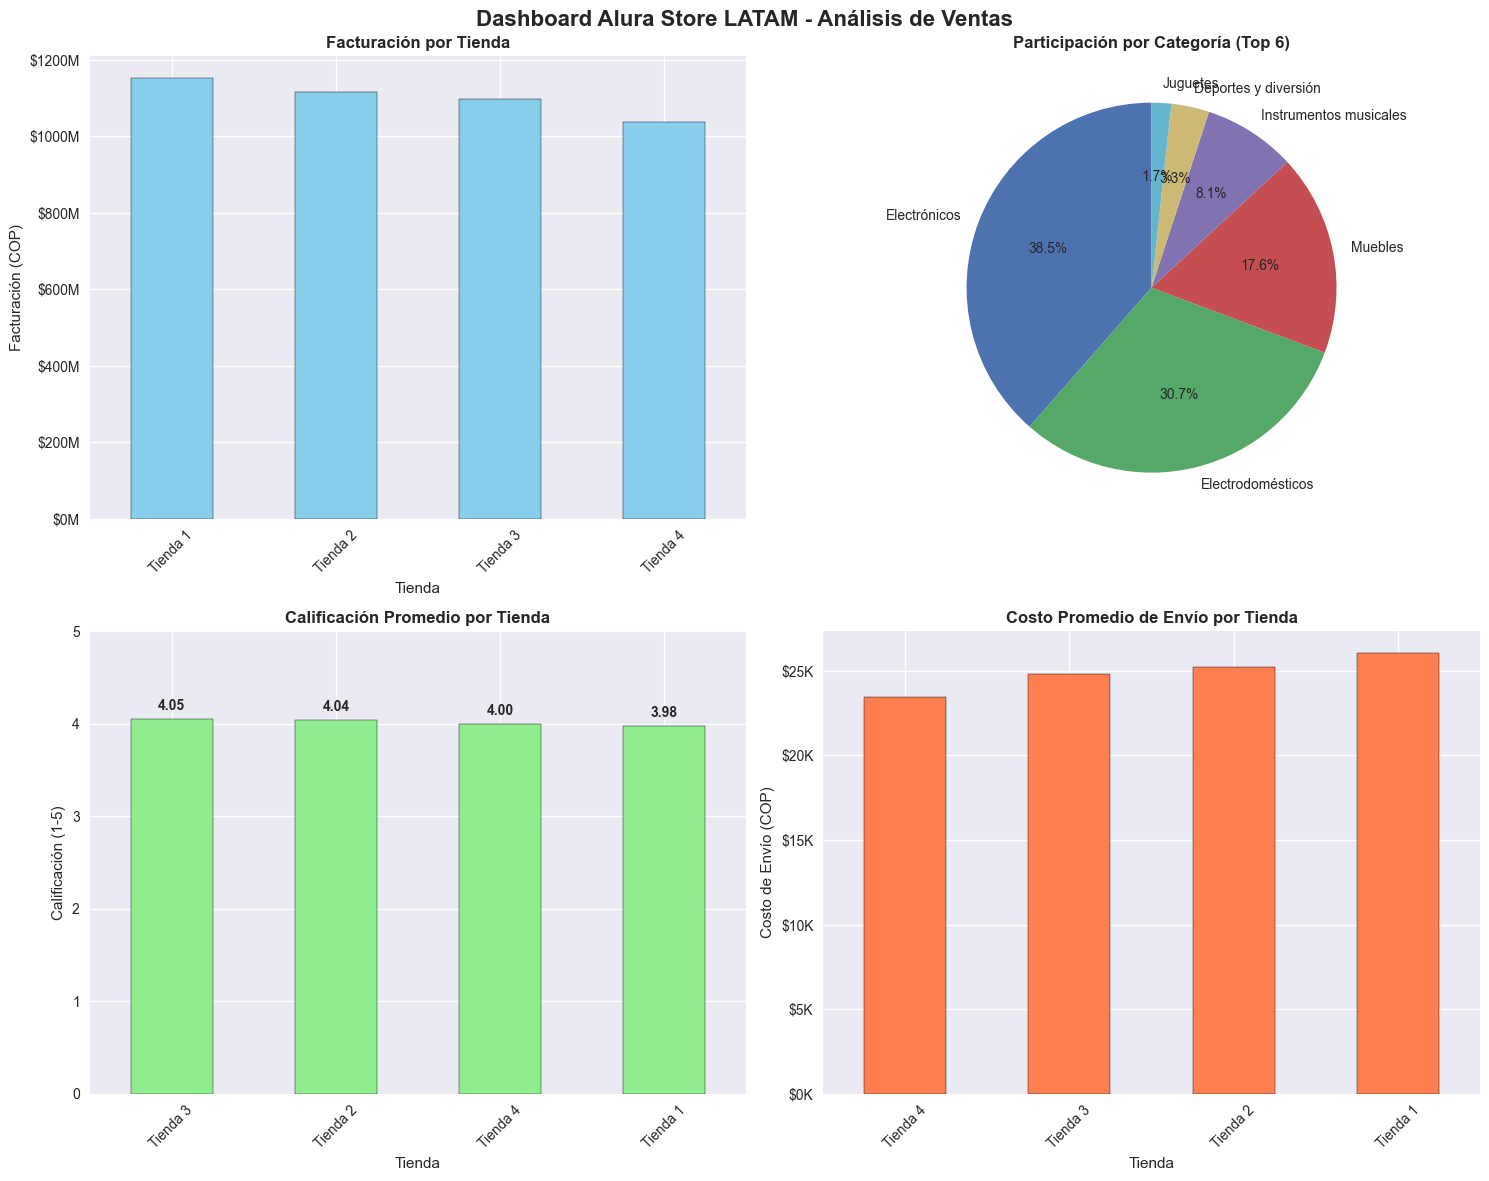


🎯 INSIGHTS CLAVE:
• Tienda 1 lidera en facturación con $1,150,880,400
• Electrónicos y Electrodomésticos representan el 67.8% de las ventas
• Tienda 3 tiene la mejor calificación promedio (4.05/5)
• Tienda 4 ofrece los envíos más económicos ($23,459)
• El 55.6% de los clientes otorgan calificación máxima (5 estrellas)


In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')

print("=== RESUMEN EJECUTIVO - ALURA STORE LATAM ===")
print(f"📊 Datos analizados: {len(datos_completos):,} transacciones")
print(f"🏪 Número de tiendas: {datos_completos['Tienda'].nunique()}")
print(f"🛍️ Productos únicos: {datos_completos['Producto'].nunique()}")
print(f"📦 Categorías: {datos_completos['Categoría del Producto'].nunique()}")
print(f"💰 Facturación total: ${datos_completos['Precio'].sum():,.0f}")
print(f"⭐ Calificación promedio: {datos_completos['Calificación'].mean():.2f}/5")

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Dashboard Alura Store LATAM - Análisis de Ventas', fontsize=16, fontweight='bold')


ax1 = axes[0,0]
facturacion_chart = facturacion_por_tienda.set_index('Tienda')['Precio']
facturacion_chart.plot(kind='bar', ax=ax1, color='skyblue', edgecolor='black')
ax1.set_title('Facturación por Tienda', fontweight='bold')
ax1.set_ylabel('Facturación (COP)')
ax1.tick_params(axis='x', rotation=45)
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e6:.0f}M'))


ax2 = axes[0,1]
top_categorias = ventas_categoria.head(6)
ax2.pie(top_categorias['Total_Ventas'], labels=top_categorias['Categoria'], autopct='%1.1f%%', startangle=90)
ax2.set_title('Participación por Categoría (Top 6)', fontweight='bold')


ax3 = axes[1,0]
calificacion_chart = calificacion_tienda.set_index('Tienda')['Calificacion_Promedio']
bars = calificacion_chart.plot(kind='bar', ax=ax3, color='lightgreen', edgecolor='black')
ax3.set_title('Calificación Promedio por Tienda', fontweight='bold')
ax3.set_ylabel('Calificación (1-5)')
ax3.set_ylim(0, 5)
ax3.tick_params(axis='x', rotation=45)
for i, (tienda, valor) in enumerate(calificacion_chart.items()):
    ax3.text(i, valor + 0.1, f'{valor:.2f}', ha='center', fontweight='bold')


ax4 = axes[1,1]
envio_chart = envio_tienda.set_index('Tienda')['Envio_Promedio']
envio_chart.plot(kind='bar', ax=ax4, color='coral', edgecolor='black')
ax4.set_title('Costo Promedio de Envío por Tienda', fontweight='bold')
ax4.set_ylabel('Costo de Envío (COP)')
ax4.tick_params(axis='x', rotation=45)
ax4.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

plt.tight_layout()
plt.show()

print(f"\n🎯 INSIGHTS CLAVE:")
print(f"• Tienda 1 lidera en facturación con ${facturacion_por_tienda.iloc[0]['Precio']:,.0f}")
print(f"• Electrónicos y Electrodomésticos representan el 67.8% de las ventas")
print(f"• Tienda 3 tiene la mejor calificación promedio (4.05/5)")
print(f"• Tienda 4 ofrece los envíos más económicos (${envio_tienda.iloc[0]['Envio_Promedio']:,.0f})")
print(f"• El 55.6% de los clientes otorgan calificación máxima (5 estrellas)")